In [1]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # your code here

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertModel, BertConfig, BertForSequenceClassification, TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df= pd.read_csv('Sum_of_Ga!pageviews,_1747811087229.csv')

In [4]:
df.isnull().sum()

id                     0
Title                  0
body                   0
Provider               6
Desk User           3492
Byline              6590
Date                   0
GA_content_type        0
section             5953
publicationlink       30
ga:pageviews         258
ga:avgtimeonpage     258
words                  0
dtype: int64

In [5]:
df.head()

,id,Title,body,Provider,Desk User,Byline,Date,GA_content_type,section,publicationlink,ga:pageviews,ga:avgtimeonpage,words
0,onecms:8a1988f7-ec84-4df5-a364-f9d1f3b39a71,Sustainability and new growth fuels TAQA’S ste...,"{""text"":""<p>Abu Dhabi National Energy Company ...",Zawya Knowledge Solutions,mohammed.mustafa@lseg.com,NaN,2025-03-10 00:00:00,Article,NaN,NaN,10947.0,41.7481,845
1,onecms:17a31caf-65df-46ee-9539-5eac0af85f5f,Discover why estate living in Cape Town is on ...,"{""text"":""<p>Estate living has become one of th...",Bizcommunity.com,NaN,Staff Writer,2025-03-19 00:00:00,Article,OTHER,https://www.zawya.com/en/business/real-estate/...,9587.0,27.7530,1039
2,onecms:669250e3-9444-4254-9a7a-69cc2ebed57a,تحليل سريع:</strong> </strong>المخاوف القادمة ...,"{""text"":""<p>&nbsp;<\/p>\n<a class=\""p-smartemb...",زاوية,shimaa_hefzi@yahoo.com,فادي قانصو,2025-03-13 00:00:00,Article,NaN,https://www.zawya.com/ar/تغطيات-زاوية/إنفوجراف...,8952.0,23.3800,1090
3,onecms:3b2974fc-24d0-4037-b64e-005a031d24de,South Africa: Government officially launches $...,"{""text"":""<p>Government has officially opened a...",Bizcommunity.com,NaN,Staff Writer,2025-04-11 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/south-...,6953.0,16.8441,490
4,onecms:cddbf845-d7a1-475c-bfe8-8514d5e5a757,“Buy Zimbabwe” won’t work until local products...,"{""text"":""<p>The recent signing of a Memorandum...",The Zimbabwean,NaN,Tendai Ruben Mbofana,2025-03-14 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/buy-zi...,6839.0,10.1211,1403


In [6]:
# Basic Cleaning
df = df.dropna(subset=['Title', 'body', 'ga:pageviews']).reset_index(drop=True)  # drop rows with missing required fields
#df['text'] = df['Title'] + ' ' + df['body']
df['views'] = df['ga:pageviews'].astype(float)

In [7]:
df.isnull().sum()

id                     0
Title                  0
body                   0
Provider               6
Desk User           3419
Byline              6423
Date                   0
GA_content_type        0
section             5820
publicationlink       28
ga:pageviews           0
ga:avgtimeonpage       0
words                  0
views                  0
dtype: int64

In [8]:
df.head()

,id,Title,body,Provider,Desk User,Byline,Date,GA_content_type,section,publicationlink,ga:pageviews,ga:avgtimeonpage,words,views
0,onecms:8a1988f7-ec84-4df5-a364-f9d1f3b39a71,Sustainability and new growth fuels TAQA’S ste...,"{""text"":""<p>Abu Dhabi National Energy Company ...",Zawya Knowledge Solutions,mohammed.mustafa@lseg.com,NaN,2025-03-10 00:00:00,Article,NaN,NaN,10947.0,41.7481,845,10947.0
1,onecms:17a31caf-65df-46ee-9539-5eac0af85f5f,Discover why estate living in Cape Town is on ...,"{""text"":""<p>Estate living has become one of th...",Bizcommunity.com,NaN,Staff Writer,2025-03-19 00:00:00,Article,OTHER,https://www.zawya.com/en/business/real-estate/...,9587.0,27.7530,1039,9587.0
2,onecms:669250e3-9444-4254-9a7a-69cc2ebed57a,تحليل سريع:</strong> </strong>المخاوف القادمة ...,"{""text"":""<p>&nbsp;<\/p>\n<a class=\""p-smartemb...",زاوية,shimaa_hefzi@yahoo.com,فادي قانصو,2025-03-13 00:00:00,Article,NaN,https://www.zawya.com/ar/تغطيات-زاوية/إنفوجراف...,8952.0,23.3800,1090,8952.0
3,onecms:3b2974fc-24d0-4037-b64e-005a031d24de,South Africa: Government officially launches $...,"{""text"":""<p>Government has officially opened a...",Bizcommunity.com,NaN,Staff Writer,2025-04-11 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/south-...,6953.0,16.8441,490,6953.0
4,onecms:cddbf845-d7a1-475c-bfe8-8514d5e5a757,“Buy Zimbabwe” won’t work until local products...,"{""text"":""<p>The recent signing of a Memorandum...",The Zimbabwean,NaN,Tendai Ruben Mbofana,2025-03-14 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/buy-zi...,6839.0,10.1211,1403,6839.0


In [9]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False


df_1 = df[df["body"].apply(is_english)]
df_1 = df[df["Title"].apply(is_english)]

In [10]:
df_1.shape

(10923, 14)

In [12]:
df_1 = df_1.copy()
df_1['count'] = df_1['body'].apply(lambda x: len(x.split()))


In [13]:
df_1.describe()

,ga:pageviews,ga:avgtimeonpage,words,views,count
count,10923.000000,10923.00000,10923.00000,10923.000000,10923.000000
mean,58.092740,5.47949,502.00650,58.092740,248.178705
std,211.976434,4.85155,328.02278,211.976434,57.414425
min,1.000000,0.50000,0.00000,1.000000,1.000000
25%,15.000000,2.20000,280.00000,15.000000,236.000000
50%,29.000000,4.04160,446.00000,29.000000,266.000000
75%,56.000000,7.00185,653.00000,56.000000,284.000000
max,10947.000000,75.09510,4927.00000,10947.000000,345.000000


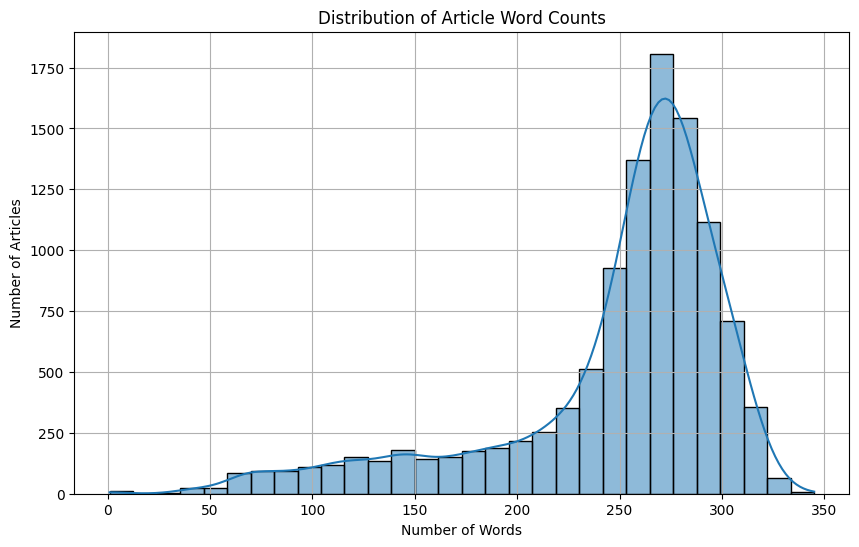

In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_1['count'], bins=30, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [15]:
import spacy
import pandas as pd # Assuming you're working with pandas DataFrames

nlp = spacy.load("en_core_web_sm")

def count_words(text):
    doc = nlp(text)
    return len([token for token in doc if token.is_alpha])

# Assuming df_1 was created by slicing or filtering another DataFrame
# To avoid SettingWithCopyWarning, explicitly create a copy
df_1 = df_1.copy()

df_1['accurate_count'] = df_1['body'].apply(count_words)

# Now, if you print df_1, you should see the new column 'accurate_count'
# and the warning will be gone.

In [17]:
df_1.reset_index(drop=True)

,id,Title,body,Provider,Desk User,Byline,Date,GA_content_type,section,publicationlink,ga:pageviews,ga:avgtimeonpage,words,views,count,accurate_count
0,onecms:8a1988f7-ec84-4df5-a364-f9d1f3b39a71,Sustainability and new growth fuels TAQA’S ste...,"{""text"":""<p>Abu Dhabi National Energy Company ...",Zawya Knowledge Solutions,mohammed.mustafa@lseg.com,NaN,2025-03-10 00:00:00,Article,NaN,NaN,10947.0,41.7481,845,10947.0,160,152
1,onecms:17a31caf-65df-46ee-9539-5eac0af85f5f,Discover why estate living in Cape Town is on ...,"{""text"":""<p>Estate living has become one of th...",Bizcommunity.com,NaN,Staff Writer,2025-03-19 00:00:00,Article,OTHER,https://www.zawya.com/en/business/real-estate/...,9587.0,27.7530,1039,9587.0,259,257
2,onecms:3b2974fc-24d0-4037-b64e-005a031d24de,South Africa: Government officially launches $...,"{""text"":""<p>Government has officially opened a...",Bizcommunity.com,NaN,Staff Writer,2025-04-11 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/south-...,6953.0,16.8441,490,6953.0,281,280
3,onecms:cddbf845-d7a1-475c-bfe8-8514d5e5a757,“Buy Zimbabwe” won’t work until local products...,"{""text"":""<p>The recent signing of a Memorandum...",The Zimbabwean,NaN,Tendai Ruben Mbofana,2025-03-14 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/africa/buy-zi...,6839.0,10.1211,1403,6839.0,239,247
4,onecms:214bd9fc-8644-459b-a0af-c97695d93c6e,Amana redefines access to global markets for b...,"{""text"":""<p>amana, the regionally born digital...",Sponsored Content,mohammed.mustafa@lseg.com,NaN,2025-04-17 00:00:00,Article,NaN,https://www.zawya.com/en/news/sponsored-conten...,4455.0,27.4630,545,4455.0,279,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,onecms:efcf7e89-a7ac-4aa9-9e0c-0ee2377ca2d8,Attacks on Zamzam and Abu Shouk camps and Al F...,"{""text"":""<p><img src=\""https://www.africa-news...",Africa Press Release,sysadmin,NaN,2025-04-12 00:00:00,Article,"Africa,Humanitarian Aid,Sudan",https://www.zawya.com/en/press-release/africa-...,2.0,1.0000,438,2.0,284,277
10919,onecms:f773a110-8bc4-450d-88d8-b6c0be29170a,The surge of contemporary African art in the g...,"{""text"":""<p>The art historical narrative, trad...",Bizcommunity.com,NaN,Marelize van Zyl,2025-04-17 00:00:00,Article,OTHER,https://www.zawya.com/en/life/the-surge-of-con...,2.0,1.0000,400,2.0,285,279
10920,onecms:f77f15a8-4c99-44be-9dbe-841c0bc5393b,Sihoo Concludes 2025 Brand Globalization Strat...,"{""text"":""GUANGZHOU, CHINA - <a href=\""https:/...",Media OutReach Newswire,sysadmin,Sihoo,2025-03-31 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/global/sihoo-...,2.0,1.0000,1085,2.0,205,171
10921,onecms:046ca1ff-6068-4015-acf1-8f521c93be16,Diginex Limited and Russell Bedford Internatio...,"{""text"":""<h4><i>New alliance provides Russell ...",Media OutReach Newswire,sysadmin,Diginex Limited,2025-03-12 00:00:00,Article,OTHER,https://www.zawya.com/en/economy/global/digine...,1.0,1.0000,1017,1.0,263,248


In [18]:
df_1[['words', 'count', 'accurate_count']].describe()


,words,count,accurate_count
count,10923.00000,10923.000000,10923.000000
mean,502.00650,248.178705,241.268882
std,328.02278,57.414425,58.024208
min,0.00000,1.000000,0.000000
25%,280.00000,236.000000,225.500000
50%,446.00000,266.000000,260.000000
75%,653.00000,284.000000,278.000000
max,4927.00000,345.000000,338.000000


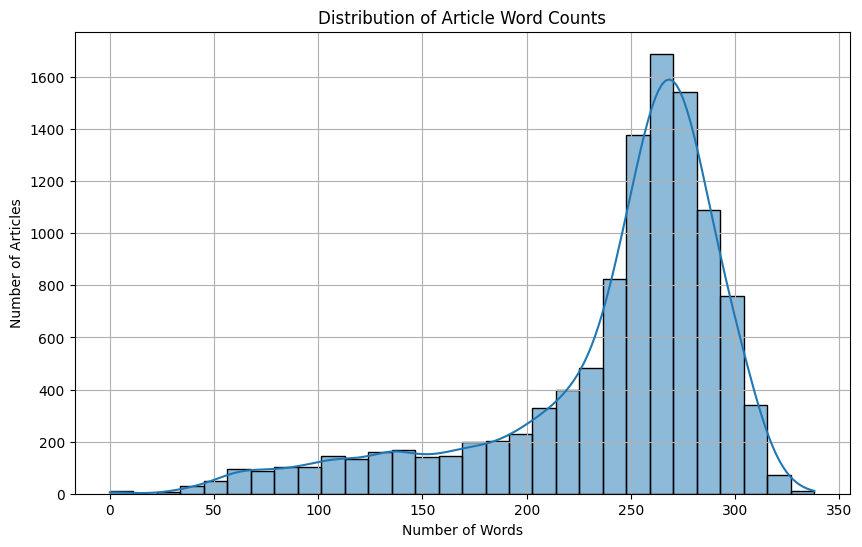

In [19]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_1['accurate_count'], bins=30, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

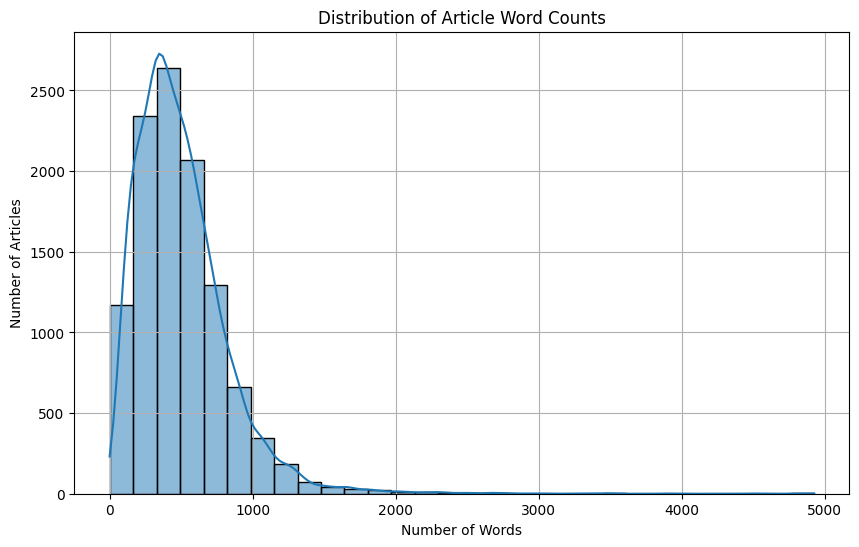

In [20]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_1['words'], bins=30, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [21]:
import html

import html
from bs4 import BeautifulSoup
import re

# --- Clean Title Text ---
def clean_html_text(text):
    if not isinstance(text, str) or not text.strip():
        return ''
    text = html.unescape(text)
    try:
        text = BeautifulSoup(text, 'html.parser').get_text(separator=' ', strip=True)
    except Exception:
        pass
    text = re.sub(r'</?[a-zA-Z0-9]+[^>]*>', '', text)
    return re.sub(r'\s+', ' ', text).strip()

#filtered_df['title_clean'] = filtered_df['Title'].apply(clean_html_text)


In [22]:
df_1["title_clean"] = df_1["Title"].apply(clean_html_text)

In [37]:
df_1 = df_1.reset_index(drop=True)


In [39]:
df_1["title_clean"][5]

'Exclusive: HSBC MENAT CEO pledges more investments to lead in wealth, capital markets'

In [29]:
df_1["Title"][6]

'Amana redefines access to global markets for both investors and active traders</strong></p>\n'

In [40]:
import re
import html
from bs4 import BeautifulSoup

def clean_json_like_html_text(text):
    if not isinstance(text, str):
        return ''
    try:
        # Step 1: Extract value from `"text":"...`
        match = re.search(r'"text"\s*:\s*"(.+)', text, flags=re.DOTALL)
        if match:
            text = match.group(1)
            text = re.sub(r'"\s*[\}\]]*$', '', text)  # remove trailing quote/bracket
        # Step 2: Decode escape characters and unescape HTML
        text = html.unescape(text)
        text = text.replace(r'\/', '/')
        text = text.encode('utf-8', 'ignore').decode('unicode_escape', 'ignore')
        # Step 3: Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text(separator=' ', strip=True)
        # Step 4: Remove URLs, @mentions, hashtags, and normalize whitespace
        text = re.sub(r"http\S+|www.\S+", "", text)
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r"\s+", " ", text)
        return text.strip()
    except Exception as e:
        print(f"Cleaning error: {e}")
        return ''


In [76]:
#df_1.reset_index(drop=True)

In [41]:
df_1['clean_body'] = df_1['body'].apply(clean_json_like_html_text)

In [42]:
df_1['body'][0]

'{"text":"<p>Abu Dhabi National Energy Company PJSC, or TAQA, is an integrated utilities firm headquartered in the UAE capital and with operations across 25 countries covering Europe, the Middle East, and Africa.<br>\\n<br>\\nTAQA has invested in power and water generation, water treatment and reuse, transmission and distribution assets, in addition to upstream and midstream oil and gas operations. Its assets are in the UAE, Canada, Ghana, India, Morocco, Oman, the Netherlands, Saudi Arabia, the United Kingdom, and the United States.<br>\\n<br>\\nIt also holds exclusive rights to transmission and distribution (T&amp;D) ventures in Abu Dhabi, maintaining a minimum 40% stake in all Emirates Water and Electricity Company (EWEC) generation projects until 2030.<\\/p>\\n<a class=\\"p-smartembed\\" data-attr-caption=\\"\\" data-attr-credit=\\"\\" data-attr-f=\\"3x2\\" data-attr-has-caption=\\"true\\" data-attr-has-credit=\\"true\\" data-attr-q=\\"0.3\\" data-attr-w=\\"400\\" data-onecms-id=\\

In [47]:
df_1['clean_body'][2]

'Government has officially opened applications for the highly anticipated R500m support fund aimed at increasing the participation of South African owned spaza shops in the townships and rural areas retail trade sector. Addressing the launch of the Spaza Shop Support Fund (SSSF), Minister of Trade, Industry and Competition, Parks Tau, said the fund will transform the spaza shop landscape by creating jobs, alleviating poverty, promoting economic inclusion and empowerment as well as stimulating local economic growth. The fund provides for funding of up to R300,000 per shop through a combination of grants and low-interest loans. It allocates funding specifically for initial stock purchases, infrastructure improvements, business development tools, and Point of Sale (POS) system adoption. Through the fund, shop owners will be provided with assistance in meeting hygiene and regulatory standards to ensure the provision of safe, high-quality products. “We are committed to ensuring that every s

In [49]:
df_1['text'] = df_1['title_clean'] + ' ' + df_1['clean_body']

In [50]:
df_1['text'][1]

'Discover why estate living in Cape Town is on the rise? Estate living has become one of the most desirable property choices in Cape Town’s suburbs, offering a secure, community-driven lifestyle with access to modern conveniences. Whether its families looking for space to grow, professionals seeking a lock-up-and-go lifestyle, or investors searching for long-term value, estates provide a compelling mix of benefits. Why estate living? The appeal of estate living extends beyond just having a beautiful home. It’s about a way of life that prioritises security, shared spaces, and a sense of belonging. Gated estates are designed to offer a holistic living experience, combining modern amenities with a carefully maintained environment that enhances both lifestyle and property value. “In today’s world, buyers want more than just four walls—they want a secure, well-managed environment that supports their lifestyle,” says Alexa Horne, managing director of DG Properties. “That’s why estate living 

In [51]:
df_1['count_text'] = df_1['text'].apply(lambda x: len(x.split()))

In [52]:
df_1[['words', 'count', 'accurate_count', 'count_text']].describe()

,words,count,accurate_count,count_text
count,10923.00000,10923.000000,10923.000000,10923.000000
mean,502.00650,248.178705,241.268882,263.824773
std,328.02278,57.414425,58.024208,60.227984
min,0.00000,1.000000,0.000000,9.000000
25%,280.00000,236.000000,225.500000,247.000000
50%,446.00000,266.000000,260.000000,283.000000
75%,653.00000,284.000000,278.000000,302.000000
max,4927.00000,345.000000,338.000000,435.000000


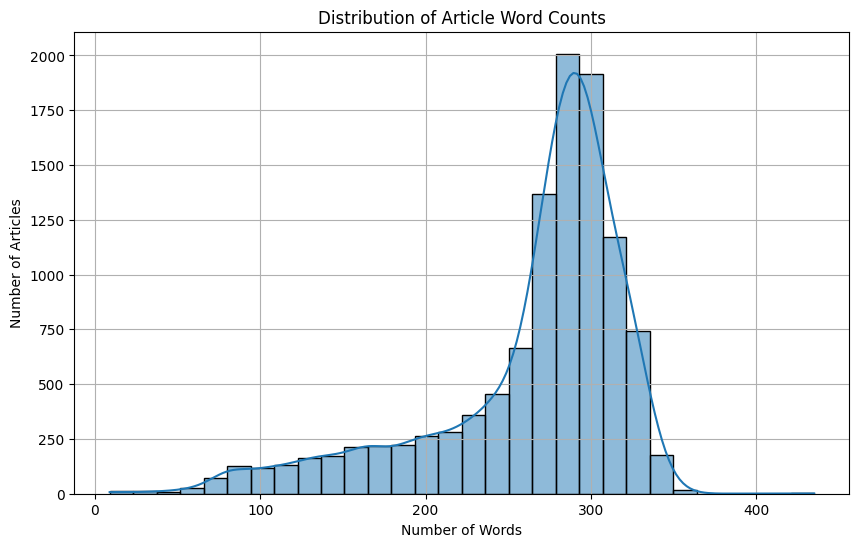

In [53]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_1['count_text'], bins=30, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [54]:
percentiles = df_1['count_text'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles)

0.50    283.0
0.75    302.0
0.90    319.0
0.95    327.0
0.99    340.0
Name: count_text, dtype: float64


In [55]:
# Filter the dataset where word count is at least 150
df_2 = df_1[df_1['count_text'] >= 100].reset_index(drop=True)

# Show result
print(f"Original dataset size: {df_1.shape[0]}")
print(f"Filtered dataset size: {df_2.shape}")

Original dataset size: 10923
Filtered dataset size: (10627, 20)


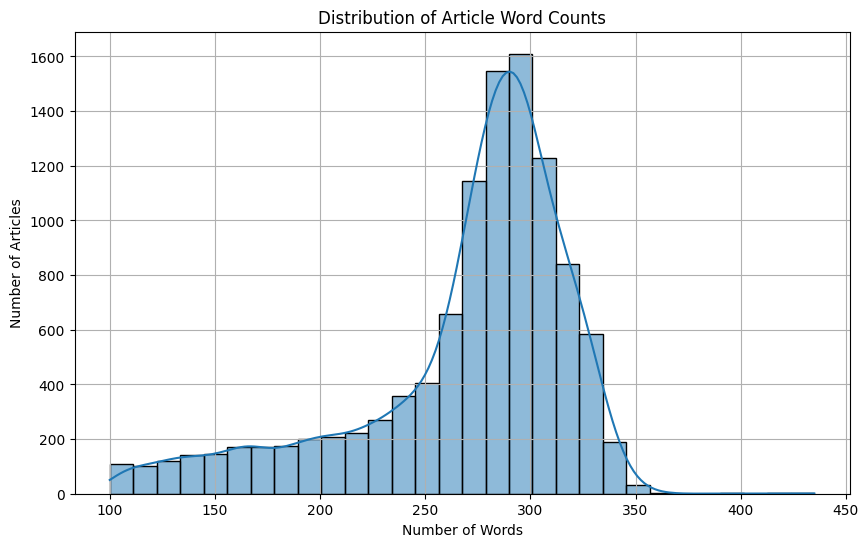

In [56]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_2['count_text'], bins=30, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

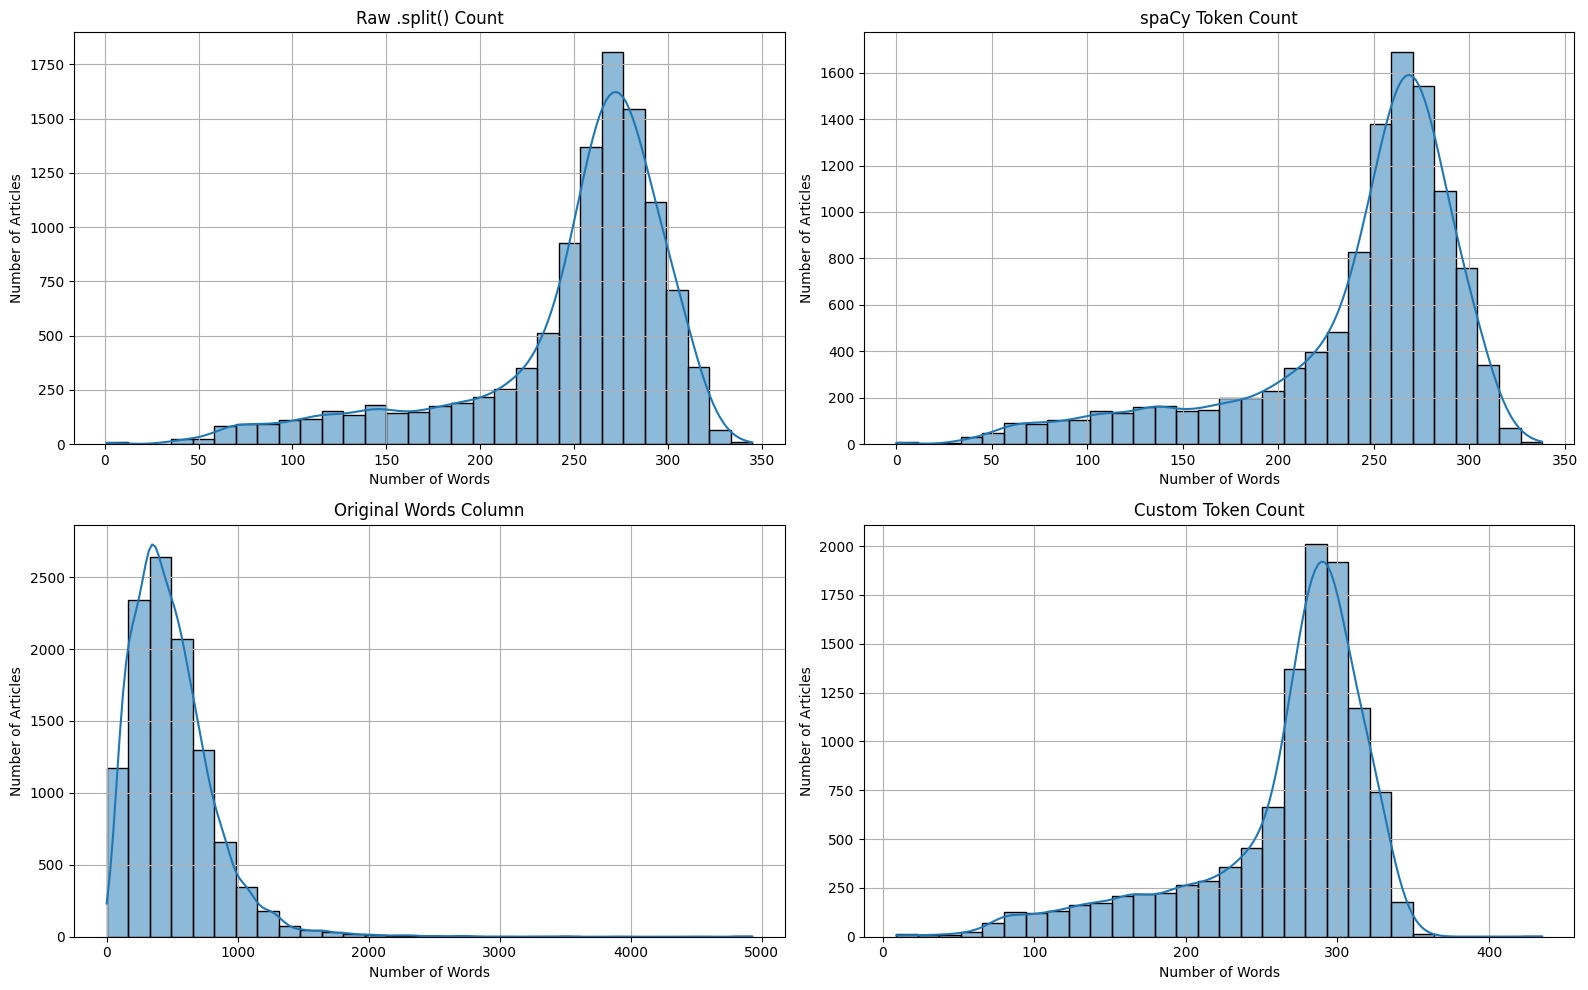

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 rows, 2 columns

# Plot 1: 'count'
sns.histplot(df_1['count'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Raw .split() Count')
axs[0, 0].set_xlabel('Number of Words')
axs[0, 0].set_ylabel('Number of Articles')
axs[0, 0].grid(True)

# Plot 2: 'accurate_count'
sns.histplot(df_1['accurate_count'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('spaCy Token Count')
axs[0, 1].set_xlabel('Number of Words')
axs[0, 1].set_ylabel('Number of Articles')
axs[0, 1].grid(True)

# Plot 3: 'words' from your dataset
sns.histplot(df_1['words'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original Words Column')
axs[1, 0].set_xlabel('Number of Words')
axs[1, 0].set_ylabel('Number of Articles')
axs[1, 0].grid(True)

# Plot 4: 'count_text'
sns.histplot(df_1['count_text'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Custom Token Count')
axs[1, 1].set_xlabel('Number of Words')
axs[1, 1].set_ylabel('Number of Articles')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [57]:
percentiles = df_2['views'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles)

0.50     29.00
0.75     57.00
0.90    107.00
0.95    165.00
0.99    439.48
Name: views, dtype: float64


In [58]:
percentiles1 = df_2['ga:avgtimeonpage'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles1)

0.50     4.07500
0.75     7.06115
0.90    10.84996
0.95    14.10046
0.99    24.52947
Name: ga:avgtimeonpage, dtype: float64


In [59]:
# Define 95th percentile thresholds
view_threshold = 166
time_threshold = 14.11

# Apply the combined filter
df_3 = df_2[(df_2['views'] <= view_threshold) & (df_2['ga:avgtimeonpage'] <= time_threshold)].copy()

# Reset index
df_3 = df_3.reset_index(drop=True)

# Display the results
print(f"Original Dataset Size: {len(df_2)}")
print(f"Filtered Dataset Size: {len(df_3)}")
print(df_3[['views', 'ga:avgtimeonpage']].head())

Original Dataset Size: 10627
Filtered Dataset Size: 9839
   views  ga:avgtimeonpage
0  166.0            6.8175
1  166.0            8.3652
2  166.0            2.8575
3  166.0            9.3464
4  165.0            3.7571


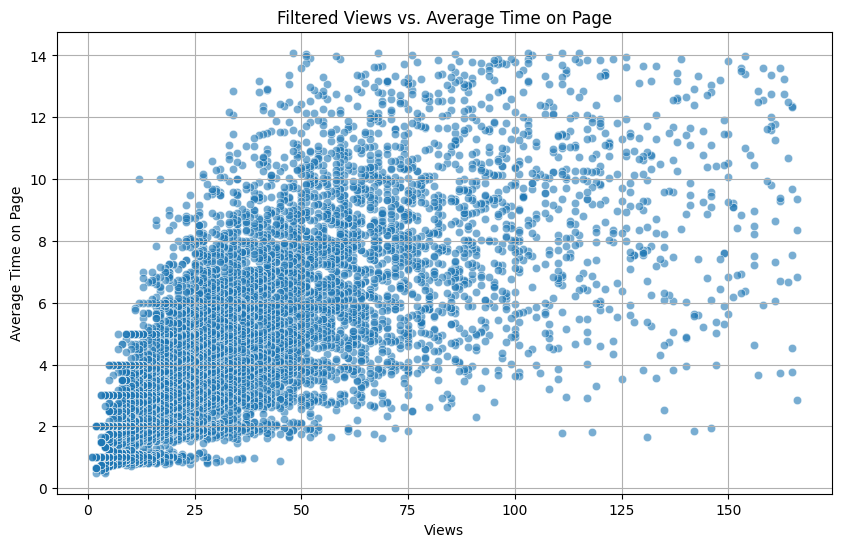

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_3['views'], df_3['ga:avgtimeonpage'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Filtered Views vs. Average Time on Page')
plt.xlabel('Views')
plt.ylabel('Average Time on Page')
plt.grid(True)
plt.show()

In [77]:
df_3.drop_duplicates(['text' ], inplace = True )

print(df_3.shape)

(9825, 20)


In [78]:
median_views = df_3['views'].median()

# Assign labels based on the median
final_df = df_3.copy()
final_df['label'] = (final_df['views'] >= median_views).astype(int)

# Reset index
final_df = final_df.reset_index(drop=True)

# Check class distribution
#print(final_df['label'].value_counts(normalize=True))

In [79]:
counts = final_df['label'].value_counts()
percentages = final_df['label'].value_counts(normalize=True).round(3)

summary = pd.DataFrame({
    'count': counts,
    'percentage': percentages
})

print(summary)

       count  percentage
label                   
1       4922       0.501
0       4903       0.499


In [80]:
# Check the correlation coefficient
correlation = final_df[['views', 'ga:avgtimeonpage']].corr()
print(correlation)


                     views  ga:avgtimeonpage
views             1.000000          0.716557
ga:avgtimeonpage  0.716557          1.000000


In [81]:
correlation = df[['views', 'ga:avgtimeonpage']].corr()
print(correlation)

                    views  ga:avgtimeonpage
views             1.00000           0.39552
ga:avgtimeonpage  0.39552           1.00000


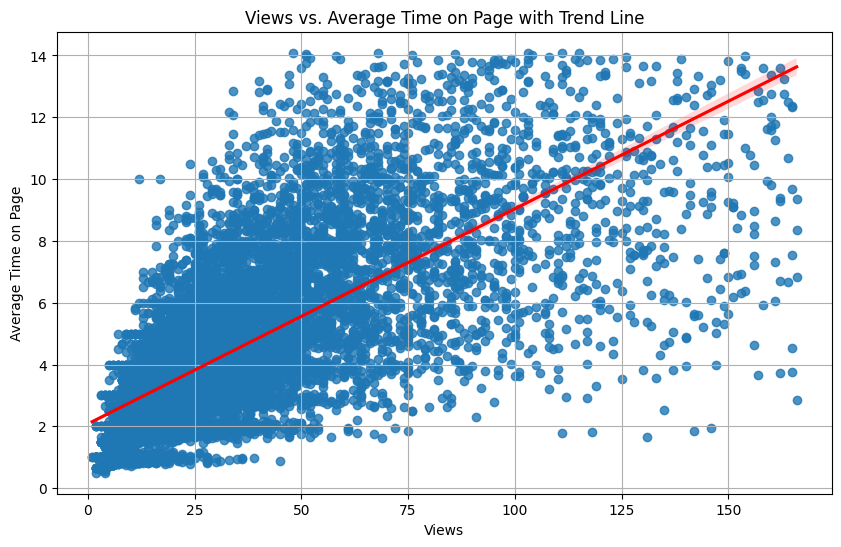

In [82]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='views', y='ga:avgtimeonpage', data=final_df, scatter=True, line_kws={"color": "red"})
plt.title('Views vs. Average Time on Page with Trend Line')
plt.xlabel('Views')
plt.ylabel('Average Time on Page')
plt.grid(True)
plt.show()

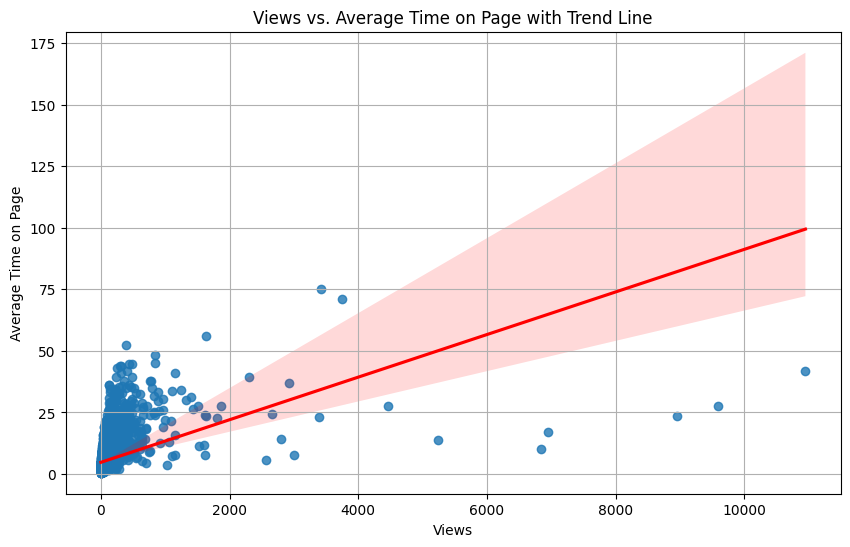

In [83]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='views', y='ga:avgtimeonpage', data=df, scatter=True, line_kws={"color": "red"})
plt.title('Views vs. Average Time on Page with Trend Line')
plt.xlabel('Views')
plt.ylabel('Average Time on Page')
plt.grid(True)
plt.show()

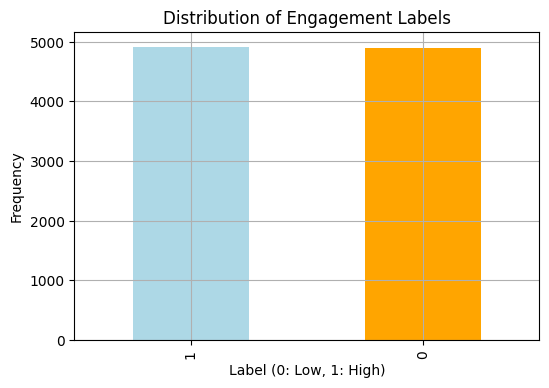

In [84]:
# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
final_df['label'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution of Engagement Labels')
plt.xlabel('Label (0: Low, 1: High)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

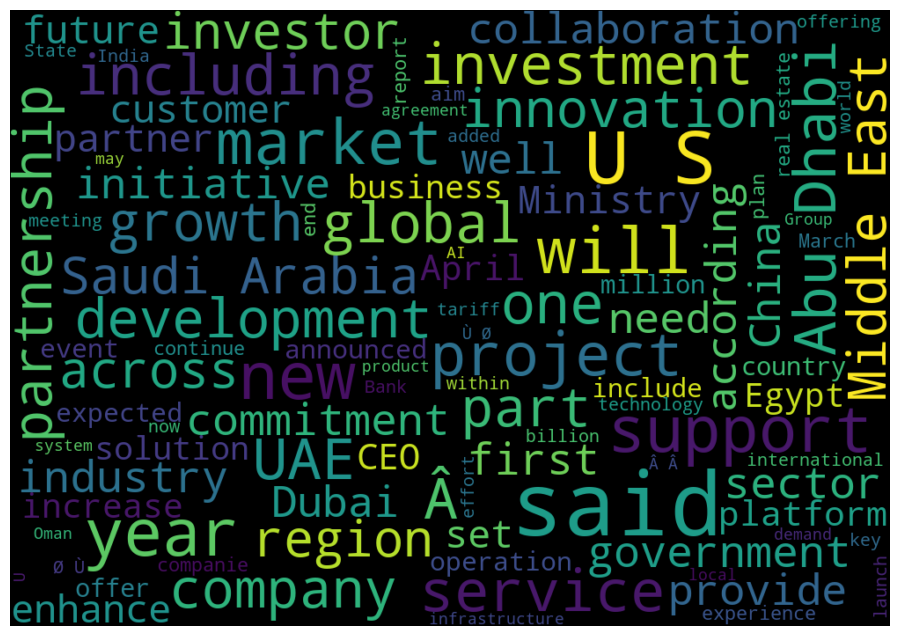

In [85]:
from wordcloud import WordCloud
txt = ' '.join(rev for rev in final_df.text )

plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100, 
    width=1000, 
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

Bert

In [97]:
X= final_df['text'].tolist()
y= final_df['label'].tolist()

In [126]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel
# Import AdamW optimizer from TensorFlow Keras optimizers
from tensorflow.keras.optimizers import AdamW

In [127]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical


# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Second split: 15% validation, 15% test (from remaining 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


In [128]:
# --- BERT Tokenization ---
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
max_len = 512

def tokenize_data(texts):
    """
    Tokenizes a list of texts using the pre-trained BERT tokenizer.
    Pads/truncates sequences to max_len and returns TensorFlow tensors.
    """
    return tokenizer(
        text=texts,
        add_special_tokens=True, # Add [CLS] and [SEP] tokens
        max_length=max_len,      # Max sequence length
        truncation=True,         # Truncate if longer than max_len
        padding='max_length',    # Pad if shorter than max_len
        return_tensors='tf',     # Return TensorFlow tensors
        return_token_type_ids=False, # Not needed for single-sentence classification
        return_attention_mask=True   # Essential for BERT to ignore padding
    )


In [129]:
# Tokenize each dataset split
train_encodings = tokenize_data(X_train)
val_encodings = tokenize_data(X_val)
test_encodings = tokenize_data(X_test)


In [130]:
print("Train input_ids shape:", train_encodings['input_ids'].shape)
print("Train attention_mask shape:", train_encodings['attention_mask'].shape)

print("Val input_ids shape:", val_encodings['input_ids'].shape)
print("Test input_ids shape:", test_encodings['input_ids'].shape)


Train input_ids shape: (6877, 512)
Train attention_mask shape: (6877, 512)
Val input_ids shape: (1474, 512)
Test input_ids shape: (1474, 512)


In [131]:
sample_text = X_train[0]
print("Original text:", sample_text)

tokens = tokenizer.tokenize(sample_text)
print("Tokens:", tokens)

ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", ids)


Original text: International Smart Card and MENA Fintech Association forge strategic partnership to shape the future of digital finance in the region Dubai, United Arab EmiratesÂ – The MENA Fintech Association (MFTA), a not-for-profit organisation based in Dubai and registered with the Abu Dhabi International Financial Centre (ADGM), today announced partnership with the International Smart Card (ISC), aka Qi, Iraq’s foremost provider of digital payments, fintech solutions, and digital identity services, as its newest corporate member. The alliance is set to catalyse innovation, accelerate digital payment adoption, and drive inclusive financial transformation across the MENA region. Through this partnership, MFTA and ISC will co-host a curated series of high-impact events across key regional hubs. These events will bring together fintech visionaries, regulatory leaders, and technology pioneers to engage in dialogue and shape the regional fintech agenda. The initiatives will provide a pl

In [132]:
decoded = tokenizer.decode(train_encodings['input_ids'][0], skip_special_tokens=True)
print("Decoded back:", decoded)


Decoded back: International Smart Card and MENA Fintech Association forge strategic partnership to shape the future of digital finance in the region Dubai, United Arab EmiratesÂ – The MENA Fintech Association ( MFTA ), a not - for - profit organisation based in Dubai and registered with the Abu Dhabi International Financial Centre ( ADGM ), today announced partnership with the International Smart Card ( ISC ), aka Qi, Iraq ’ s foremost provider of digital payments, fintech solutions, and digital identity services, as its newest corporate member. The alliance is set to catalyse innovation, accelerate digital payment adoption, and drive inclusive financial transformation across the MENA region. Through this partnership, MFTA and ISC will co - host a curated series of high - impact events across key regional hubs. These events will bring together fintech visionaries, regulatory leaders, and technology pioneers to engage in dialogue and shape the regional fintech agenda. The initiatives wi

In [133]:
import numpy as np

print("y_train:", np.unique(y_train, return_counts=True))
print("y_val:", np.unique(y_val, return_counts=True))
print("y_test:", np.unique(y_test, return_counts=True))


y_train: (array([0, 1]), array([3432, 3445]))
y_val: (array([0, 1]), array([735, 739]))
y_test: (array([0, 1]), array([736, 738]))


In [135]:
assert train_encodings['input_ids'].shape[0] == len(y_train), "Mismatch in train set!"
assert val_encodings['input_ids'].shape[0] == len(y_val), "Mismatch in val set!"
assert test_encodings['input_ids'].shape[0] == len(y_test), "Mismatch in test set!"
print("All sizes match ✅")


All sizes match ✅


In [136]:

# --- Custom BERT Embedding Layer ---
class BertEmbedding(tf.keras.layers.Layer):
    """
    A custom Keras layer to wrap the Hugging Face TFAutoModel.
    This allows BERT to be integrated directly into a Keras Sequential or Functional API model.
    """
    def __init__(self, model, **kwargs):
        super(BertEmbedding, self).__init__(**kwargs)
        self.bert = model # The pre-trained TFAutoModel

    def call(self, inputs):
        # Call the BERT model with input_ids and attention_mask
        # bert(inputs)[0] returns the last_hidden_state (sequence of contextual embeddings)
        return self.bert(inputs)[0]

# --- Model Definition (BERT + CNN) ---
# Load pretrained BERT model
# Set trainable=True to fine-tune BERT weights during training
bert_model = TFAutoModel.from_pretrained('bert-base-cased')
bert_model.trainable = True

# Define input layers for BERT
input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# Pass BERT inputs through the custom BertEmbedding layer
# The output 'bert_output' has shape (batch_size, sequence_length, hidden_size)
bert_output = BertEmbedding(bert_model)({'input_ids': input_ids, 'attention_mask': attention_mask})


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [137]:
# Add CNN layer
# Conv1D extracts local features (n-grams) from the BERT embeddings
conv = tf.keras.layers.Conv1D(1024, kernel_size=3, activation='relu', name='conv_layer')(bert_output)
# GlobalMaxPooling1D pools the most prominent features across the sequence
pool = tf.keras.layers.GlobalMaxPooling1D(name='global_max_pooling_layer')(conv)

# Add Dense (fully connected) layers for classification
dense1 = tf.keras.layers.Dense(512, activation='relu', name='dense_layer_1')(pool)
dense2 = tf.keras.layers.Dense(256, activation='relu', name='dense_layer_2')(dense1)
# Dropout for regularization to prevent overfitting
dropout = tf.keras.layers.Dropout(0.2, name='dropout_layer')(dense2)

# Output layer for binary classification
# Sigmoid activation outputs a probability between 0 and 1
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(dropout)

# Build the complete Keras model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# --- Create TensorFlow Datasets ---
# Define batch size
batch_size = 16


def create_dataset(encodings, labels):
    """
    Creates a tf.data.Dataset from tokenized inputs and labels.
    """
    return tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask']
        },
        labels
    ))

# Create datasets for training, validation, and testing
# Shuffle training data, batch all datasets, and prefetch for performance
train_dataset = create_dataset(train_encodings, y_train).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = create_dataset(val_encodings, y_val).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = create_dataset(test_encodings, y_test).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [149]:
# --- Learning Rate Schedule and Optimizer ---
epochs = 3
initial_learning_rate = 5e-5 # Initial learning rate from your original code
warmup_steps_ratio = 0.1 # Percentage of total steps for warmup (e.g., 10%)
weight_decay = 0.01 # Common weight decay for AdamW

# Calculate total training steps
# Using len(X_train) for robust calculation, especially if tf.data.Dataset.cardinality is UNKNOWN
num_train_samples = len(X_train)
num_train_batches = num_train_samples // batch_size + (1 if num_train_samples % batch_size else 0)
num_train_steps = num_train_batches * epochs

num_warmup_steps = int(num_train_steps * warmup_steps_ratio)

class LinearWarmupLinearDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, num_warmup_steps, num_train_steps, min_lr_ratio=0.0):
        super().__init__()
        self.initial_learning_rate = initial_learning_rate
        self.num_warmup_steps = tf.cast(num_warmup_steps, dtype=tf.float32)
        self.num_train_steps = tf.cast(num_train_steps, dtype=tf.float32)
        self.min_lr_ratio = tf.cast(min_lr_ratio, dtype=tf.float32)

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)

        warmup_lr = self.initial_learning_rate * (step / self.num_warmup_steps)

        decay_factor = 1.0 - ((step - self.num_warmup_steps) / (self.num_train_steps - self.num_warmup_steps))
        decay_factor = tf.maximum(self.min_lr_ratio, decay_factor)
        decayed_lr = self.initial_learning_rate * decay_factor

        return tf.cond(
            step < self.num_warmup_steps,
            lambda: warmup_lr,
            lambda: decayed_lr
        )


# Instantiate the custom learning rate schedule
lr_schedule = LinearWarmupLinearDecay(
    initial_learning_rate=initial_learning_rate,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

# Instantiate the AdamW optimizer with the learning rate schedule and weight decay
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=weight_decay)


In [150]:
# --- Model Compilation ---
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', # Appropriate loss for binary classification with sigmoid output
              metrics=['accuracy'])      # Monitor accuracy during training

# Display model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ attention_mask      │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ids           │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_embedding_1    │ (None, 512, 768)  │          0 │ attention_mask[0… │
│ (BertEmbedding)     │                   │            │ input_ids[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_layer (Conv1D) │ (None, 510, 1024) │  2,360,320 │ bert_embedding_1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1024)      │          0 │ conv_layer[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer_1       │ (None, 512)       │    524,800 │ global_max_pooli… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_layer_2       │ (None, 256)       │    131,328 │ dense_layer_1[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer       │ (None, 256)       │          0 │ dense_layer_2[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │        257 │ dropout_layer[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,016,705 (11.51 MB)

 Trainable params: 3,016,705 (11.51 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# --- Model Training ---
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs # Number of training epochs
)


Epoch 1/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 1839s 4s/step - accuracy: 0.5546 - loss: 0.7069 - val_accuracy: 0.7083 - val_loss: 0.5659
Epoch 2/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 2416s 6s/step - accuracy: 0.7259 - loss: 0.5365 - val_accuracy: 0.7151 - val_loss: 0.5412
Epoch 3/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 1843s 4s/step - accuracy: 0.8077 - loss: 0.4385 - val_accuracy: 0.7313 - val_loss: 0.5286


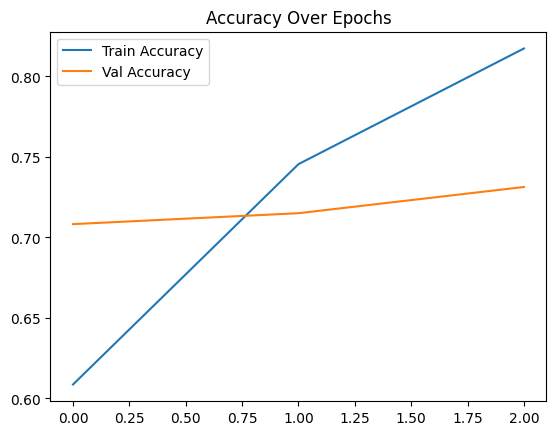

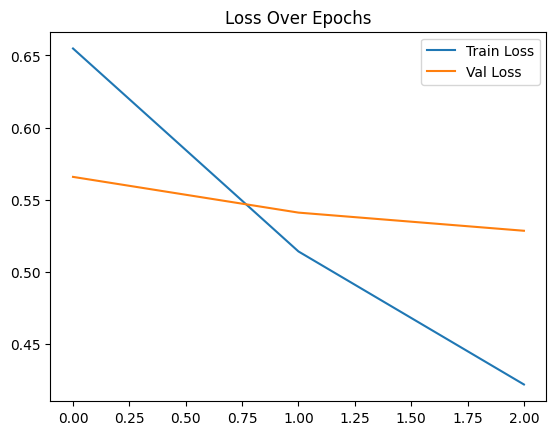

In [153]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [154]:
# --- Model Training ---
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs= 1 # Number of training epochs
)


430/430 ━━━━━━━━━━━━━━━━━━━━ 1816s 4s/step - accuracy: 0.8442 - loss: 0.3927 - val_accuracy: 0.7313 - val_loss: 0.5286
